In [1]:
import pandas as pd
import numpy as np

In [2]:
df_genre = pd.read_csv("data/selected_genres.csv")
df_genre.head(1)

,ALink,SName,SLink,Lyric,language,Artist,Genres,Songs,Popularity,genre
0,/ivete-sangalo/,Careless Whisper,/ivete-sangalo/careless-whisper.html,I feel so unsure\nAs I take your hand and lead...,en,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,Romântico


### Generate dataframe for each selected genre

In [3]:
# replace name of Romantico to avoid future problems
# Must be adjusted if there are any other special symbols, 
# a general processing function is likely not neccessary
df_genre["genre"] = df_genre.genre.str.replace("Romântico","Romantico")

In [4]:
genre_dict = {}
for genre in df_genre.genre.unique():
    genre_dict[genre] = df_genre.loc[df_genre.genre==genre]

In [5]:
print(f"Analysing the following genres:{df_genre.genre.unique()}")

Analysing the following genres:['Romantico' 'Rap' 'Gospel/Religioso' 'Country' 'Heavy Metal' 'Hardcore']


# Preprocess text
Some basic preprocessing

In [6]:
import nltk, string, re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import words
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')
nltk.download('stopwords')

extra_words_to_remove = ["im", "verse", "™", "lyric", "chorus"]
def process_lyrics(df):
    tknzr = TweetTokenizer()
    lemmatizer = WordNetLemmatizer()
    stop_words = nltk.corpus.stopwords.words('english')
    punctuation = list(string.punctuation)
    remove = set(stop_words + punctuation)
    regex = "[-!\"#$€%&'()*+,./:;<=>?@[\]^_`{|}~”1234567890]"
    lyrics_tokenized = list(df.Lyric.apply(lambda x: [re.sub(regex, "", lemmatizer.lemmatize(i)) for i in tknzr.tokenize(x.lower()) if i not in remove and len(i) > 1]))
    for j, text in enumerate(lyrics_tokenized):
        lyrics_tokenized[j] = list(filter(None, text))
        
    for j, text in enumerate(lyrics_tokenized): 
        for i, word in enumerate(text):
            if word in extra_words_to_remove or len(word) < 2:
                text.pop(i)        
    return lyrics_tokenized

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/thenextmz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/thenextmz/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to /home/thenextmz/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/thenextmz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
processed_lyrics = {}

for genre in genre_dict:   
    df_genre = genre_dict[genre]
    print(f"Processing {genre}")
    pl = process_lyrics(df_genre)
    processed_lyrics[genre] = pl   

Processing Romantico
Processing Rap
Processing Gospel/Religioso
Processing Country
Processing Heavy Metal
Processing Hardcore


# Print data stats

In [8]:
for genre in genre_dict:
    n_songs =  len(processed_lyrics[genre])
    songs = processed_lyrics[genre]
    total_words = 0
    unique_words = 0
    for song in songs:
        unique_words+= len(np.unique(song))
        total_words+=len(song)
    avg_song_len = total_words/len(songs)
    avg_uq_words = unique_words/len(songs)
    print(f"Genre:{genre}")
    print(f"Number of songs:{n_songs}")
    print(f"Average number of words per song:{round(avg_song_len)}")
    print(f"Average number of UNIQUE words per song:{round(avg_uq_words)}")
    print(f"Unique words: {round(100*(avg_uq_words/avg_song_len))}%")
    print("------\n")

Genre:Romantico
Number of songs:16516
Average number of words per song:115
Average number of UNIQUE words per song:59
Unique words: 51%
------

Genre:Rap
Number of songs:16820
Average number of words per song:284
Average number of UNIQUE words per song:166
Unique words: 58%
------

Genre:Gospel/Religioso
Number of songs:5888
Average number of words per song:90
Average number of UNIQUE words per song:51
Unique words: 56%
------

Genre:Country
Number of songs:9749
Average number of words per song:103
Average number of UNIQUE words per song:60
Unique words: 58%
------

Genre:Heavy Metal
Number of songs:19562
Average number of words per song:101
Average number of UNIQUE words per song:60
Unique words: 60%
------

Genre:Hardcore
Number of songs:5002
Average number of words per song:94
Average number of UNIQUE words per song:54
Unique words: 57%
------



# Term frequencies and n-grams
- term frequency calculated with freqdist
- tf_per_genre = all terms of one genre ranked (independent of song)
- tf_per_genre_per_song = contains tf for each song

In [9]:
def tf(df,lyrics_tokenized,token_Freq):  
    song_names = list(df.SName.values)
    tf_per_song = {}
    
    for idx,val in enumerate(song_names):
        sname = song_names[idx]
        text = lyrics_tokenized[idx]
        token_freq.update(text)
        tf_per_song[sname]= nltk.FreqDist(text) 
    return tf_per_song

tf_per_genre = {}
tf_per_genre_per_song = {}

tf_genre_dict = {}
count = 0
for genre in processed_lyrics:
    token_freq = nltk.FreqDist()
    pl = processed_lyrics[genre]
    df = genre_dict[genre]
    print(f"Calculating tf for {genre}")
    tf_per_genre_per_song[genre] = tf(df,pl,token_freq)
    tf_per_genre[genre]= token_freq

Calculating tf for Romantico
Calculating tf for Rap
Calculating tf for Gospel/Religioso
Calculating tf for Country
Calculating tf for Heavy Metal
Calculating tf for Hardcore


In [10]:
for genre in tf_per_genre:
    freq = tf_per_genre[genre]
    n = 10
    print(f"Top {n} terms for {genre}:")
    print(dict(freq.most_common(10)))
    print("----------------------")

Top 10 terms for Romantico:
{'love': 37251, 'know': 29692, 'like': 21826, 'oh': 21669, 'go': 16494, 'time': 16288, 'baby': 16115, 'one': 15316, 'never': 15287, 'got': 14129}
----------------------
Top 10 terms for Rap:
{'like': 78220, 'nigga': 61904, 'get': 60212, 'got': 56578, 'know': 50984, 'aint': 39171, 'yeah': 34767, 'go': 30552, 'shit': 30545, 'bitch': 30133}
----------------------
Top 10 terms for Gospel/Religioso:
{'love': 8750, 'know': 6583, 'oh': 4762, 'like': 4595, 'life': 4551, 'god': 4494, 'lord': 4427, 'come': 4384, 'one': 4329, 'heart': 4239}
----------------------
Top 10 terms for Country:
{'love': 14658, 'bill': 12024, 'monroe': 11760, 'know': 10524, 'like': 9234, 'time': 7952, 'got': 7403, 'go': 7226, 'one': 7207, 'oh': 6814}
----------------------
Top 10 terms for Heavy Metal:
{'time': 16742, 'know': 16377, 'one': 15059, 'see': 14116, 'never': 13758, 'life': 13735, 'like': 13562, 'love': 12082, 'come': 12046, 'take': 11327}
----------------------
Top 10 terms for Har

In [11]:
def n_grams(df, lyrics_tokenized, window_size):
    song_names = list(df.SName.values)
    n_grams_per_song = {}
    for idx,val in enumerate(song_names):
        n_grams_arr = []
        text = lyrics_tokenized[idx]
        for i, word in enumerate(text):
            for j in range(1, window_size + 1):
                if(i + j <= len(text) - 1):
                    n_grams_arr.append((word, text[i + j]))     
        n_grams_per_song[idx] = n_grams_arr
    return n_grams_per_song

n_gram_per_genre_per_song = {}
window_size = 1
for genre in processed_lyrics:
    pl = processed_lyrics[genre]
    df = genre_dict[genre]
    print(f"Calculating n_grams for {genre}")
    n_gram_per_genre_per_song[genre] = n_grams(df, pl, window_size)

Calculating n_grams for Romantico
Calculating n_grams for Rap
Calculating n_grams for Gospel/Religioso
Calculating n_grams for Country
Calculating n_grams for Heavy Metal
Calculating n_grams for Hardcore


In [12]:
from collections import Counter

num_most = 10
def get_most_common_ngrams(n_grams_one_genre):
    all_n_grams_per_genre = []
    for idx in n_grams_one_genre:
        for n_gram in n_grams_one_genre[idx]:
              all_n_grams_per_genre.append(n_gram)
    return(Counter(all_n_grams_per_genre))       

most_common_per_genre = {}
for genre in n_gram_per_genre_per_song:
    most_common_per_genre[genre] = get_most_common_ngrams(n_gram_per_genre_per_song[genre])
    print(f"The {num_most} most common phrases for {genre} are:")
    print(most_common_per_genre[genre].most_common(num_most))
    print("----------------------")

The 10 most common phrases for Romantico are:
[(('oh', 'oh'), 5143), (('la', 'la'), 3387), (('love', 'love'), 3151), (('let', 'go'), 2979), (('yeah', 'yeah'), 2414), (('feel', 'like'), 1935), (('know', 'know'), 1774), (('ive', 'got'), 1567), (('na', 'na'), 1416), (('oh', 'yeah'), 1406)]
----------------------
The 10 most common phrases for Rap are:
[(('yeah', 'yeah'), 5966), (('oh', 'oh'), 4004), (('feel', 'like'), 2602), (('aint', 'got'), 2287), (('know', 'know'), 2249), (('get', 'get'), 2131), (('let', 'go'), 1926), (('give', 'fuck'), 1812), (('la', 'la'), 1791), (('go', 'go'), 1737)]
----------------------
The 10 most common phrases for Gospel/Religioso are:
[(('oh', 'oh'), 937), (('let', 'go'), 803), (('holy', 'holy'), 587), (('love', 'love'), 551), (('la', 'la'), 531), (('feel', 'like'), 459), (('know', 'know'), 405), (('na', 'na'), 397), (('one', 'day'), 393), (('set', 'free'), 389)]
----------------------
The 10 most common phrases for Country are:
[(('bill', 'monroe'), 11754), 

In [13]:
def no_repetition_ngrams(phrases):
    unique = []
    for i, phrase in enumerate(phrases):
        if phrase[0] != phrase[1]:
            unique.append(phrase)
    return unique

no_repetition = {}
for genre in most_common_per_genre:
    no_repetition[genre] = no_repetition_ngrams(most_common_per_genre[genre])
    print(f"Percentage of n_grams without repetition for genre {genre} is {round(100*(len(no_repetition[genre])/len(most_common_per_genre[genre])), 4)}%")

Percentage of n_grams without repetition for genre Romantico is 99.4177%
Percentage of n_grams without repetition for genre Rap is 99.6102%
Percentage of n_grams without repetition for genre Gospel/Religioso is 99.3614%
Percentage of n_grams without repetition for genre Country is 99.5859%
Percentage of n_grams without repetition for genre Heavy Metal is 99.6031%
Percentage of n_grams without repetition for genre Hardcore is 99.3485%


In [14]:
overlap_arr = []
for i, genre in enumerate(n_gram_per_genre_per_song):
        for j, genre2 in enumerate(most_common_per_genre):
            if genre != genre2 and j >= i:
                overlap = len(set(most_common_per_genre[genre])&set(most_common_per_genre[genre2])) / float(len(set(most_common_per_genre[genre]) | set(most_common_per_genre[genre2]))) * 100
                overlap_arr.append({"genre_pair": (genre,genre2), "overlap": overlap})
                

In [15]:
import operator
sorted_overlap = sorted(overlap_arr, key=operator.itemgetter('overlap'), reverse=True)
gp = "genre_pair"
olp = "overlap"
for elem in sorted_overlap:
    print(f"N_gram overlap of {elem[gp][0]} & {elem[gp][1]} = {round(elem[olp])}%")

N_gram overlap of Romantico & Country = 16%
N_gram overlap of Romantico & Heavy Metal = 13%
N_gram overlap of Gospel/Religioso & Country = 12%
N_gram overlap of Romantico & Gospel/Religioso = 11%
N_gram overlap of Country & Heavy Metal = 11%
N_gram overlap of Gospel/Religioso & Hardcore = 11%
N_gram overlap of Country & Hardcore = 11%
N_gram overlap of Romantico & Hardcore = 11%
N_gram overlap of Romantico & Rap = 9%
N_gram overlap of Gospel/Religioso & Heavy Metal = 9%
N_gram overlap of Heavy Metal & Hardcore = 9%
N_gram overlap of Rap & Heavy Metal = 8%
N_gram overlap of Rap & Country = 7%
N_gram overlap of Rap & Hardcore = 5%
N_gram overlap of Rap & Gospel/Religioso = 4%


# Word Cloud

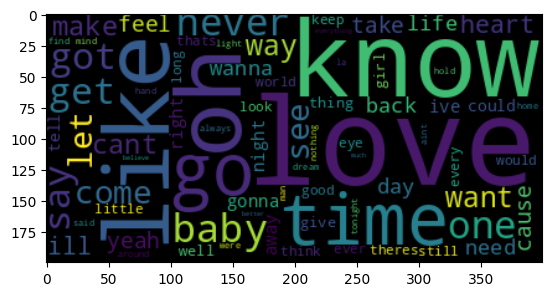

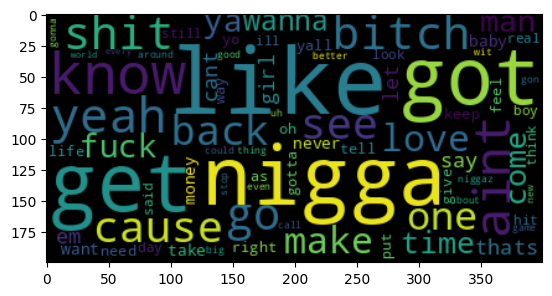

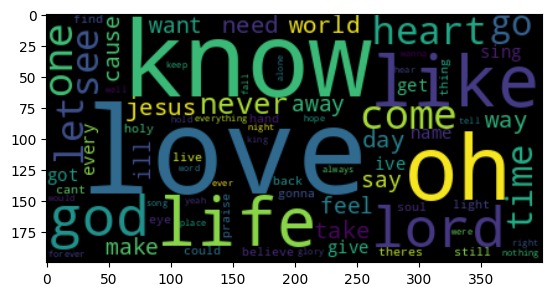

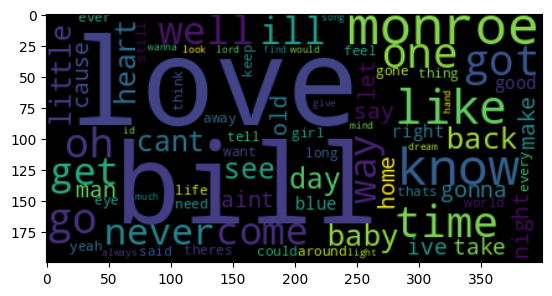

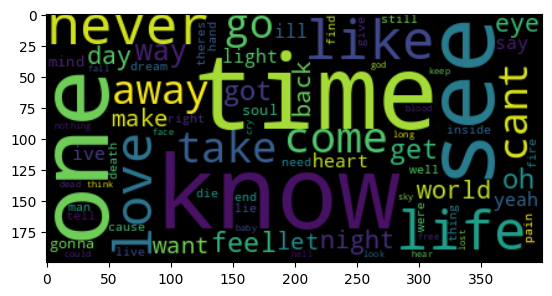

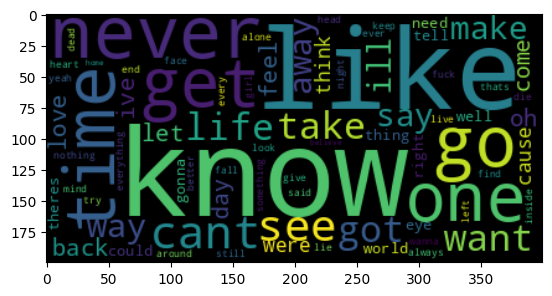

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for genre in tf_per_genre:
    freq = tf_per_genre[genre]
    freq_dict = dict(freq.most_common(75))
    wordcloud = WordCloud().generate_from_frequencies(freq_dict)
    plt.imshow(wordcloud, interpolation="bilinear")    
    fname = genre
    if "/" in fname:
        fname = fname.replace("/","_")
    plt.savefig(f"plots/{fname}_wordcloud.png")
    plt.show()

# Sentiment of genres
- Basic implementation of sentiment analysis
- Sentences need to be split because else they will be too long for the model
- Splitting can be improved, preprocessing steps applied etc.
- For now only down on small amounts of data (because the model is really slow), should be plotted and compares

In [17]:
#!pip install -q transformers
from transformers import pipeline

model = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")

In [18]:
def get_sentiment(genre,n_songs=20):
    sentiment_scores = {
    "NEGATIVE":{"count":0,"score":0},
    #"NEU":{"count":0,"score":0},
    "POSITIVE":{"count":0,"score":0}
    }
    nr_sentences = 0
    songs = genre_dict[genre].Lyric.values[0:n_songs]
    for song in songs:
        sentences = song.split("\n")
        #sentences = song
        nr_sentences+=len(sentences)
        sent = model(sentences)    
        for s in sent:
            label = s["label"]
            score =s["score"]
            sentiment_scores[label]["count"]+=1
            sentiment_scores[label]["score"]+=score
    for label in sentiment_scores:
        if sentiment_scores[label]["count"]!=0:
            sentiment_scores[label]["score"]/=sentiment_scores[label]["count"]
            sentiment_scores[label]["count"]/=nr_sentences
    return sentiment_scores

sentiment_dict = {}
for genre in genre_dict:
    print(f"getting sentiment for genre:{genre}")
    sentiment_dict[genre]= get_sentiment(genre,20)       

getting sentiment for genre:Romantico
getting sentiment for genre:Rap
getting sentiment for genre:Gospel/Religioso
getting sentiment for genre:Country
getting sentiment for genre:Heavy Metal
getting sentiment for genre:Hardcore


### Plotting

In [19]:
vals= []
labels_genre = []
pos = []
neg = []
for genre in sentiment_dict:
    senti = sentiment_dict[genre]
    labels_genre.append(genre)
    labels_senti= ["POSITIVE","NEGATIVE"]
    vals.append([senti["POSITIVE"]["count"],senti["NEGATIVE"]["count"]])
    pos.append(senti["POSITIVE"]["count"])
    neg.append(senti["NEGATIVE"]["count"])

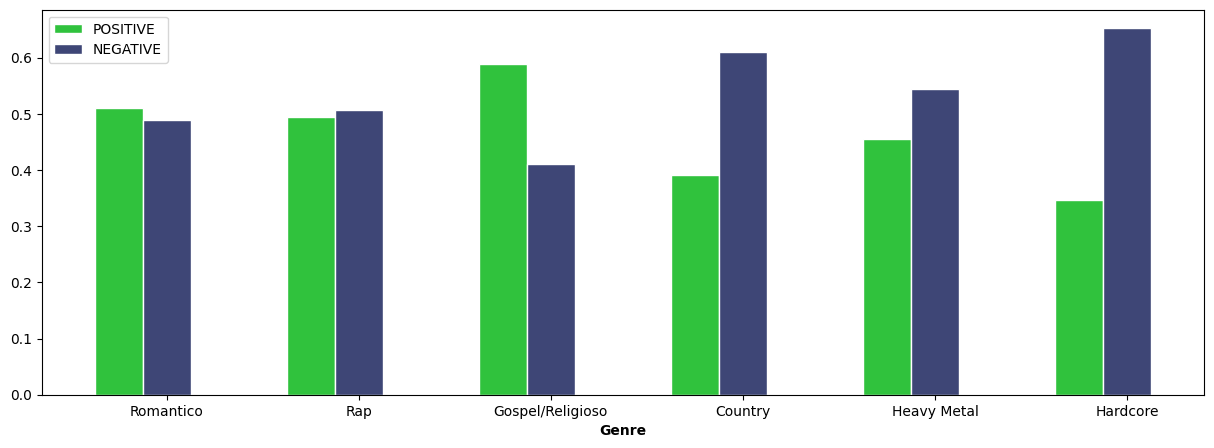

<Figure size 640x480 with 0 Axes>

In [20]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bars
barWidth = 0.25
 
# set heights of bars

# Set position of bar on X axis
r1 = np.arange(len(pos))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.figure(figsize=(15, 5))
plt.bar(r1, pos, color='#30C23D', width=barWidth, edgecolor='white', label='POSITIVE')
plt.bar(r2, neg, color='#3E4676', width=barWidth, edgecolor='white', label='NEGATIVE')

# Add xticks on the middle of the group bars
plt.xlabel('Genre', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(labels_genre))], labels_genre)
 
# Create legend & Show graphic
plt.legend()
plt.show()
plt.savefig("plots/sentiment.png")

# Clustering

/home/thenextmz/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/thenextmz/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


K-means clustering
---------------------------------
Romantico
Accuracy: 29.75%
---------------------------------
Rap
Accuracy: 71.50%
---------------------------------
Gospel/Religioso
Accuracy: 39.00%
---------------------------------
Country
Accuracy: 0.00%
---------------------------------
Heavy Metal
Accuracy: 51.00%
---------------------------------
Hardcore
Accuracy: 18.75%
---------------------------------
---------------------------------
Avg. Accuracy: 35.00%
---------------------------------
---------------------------------


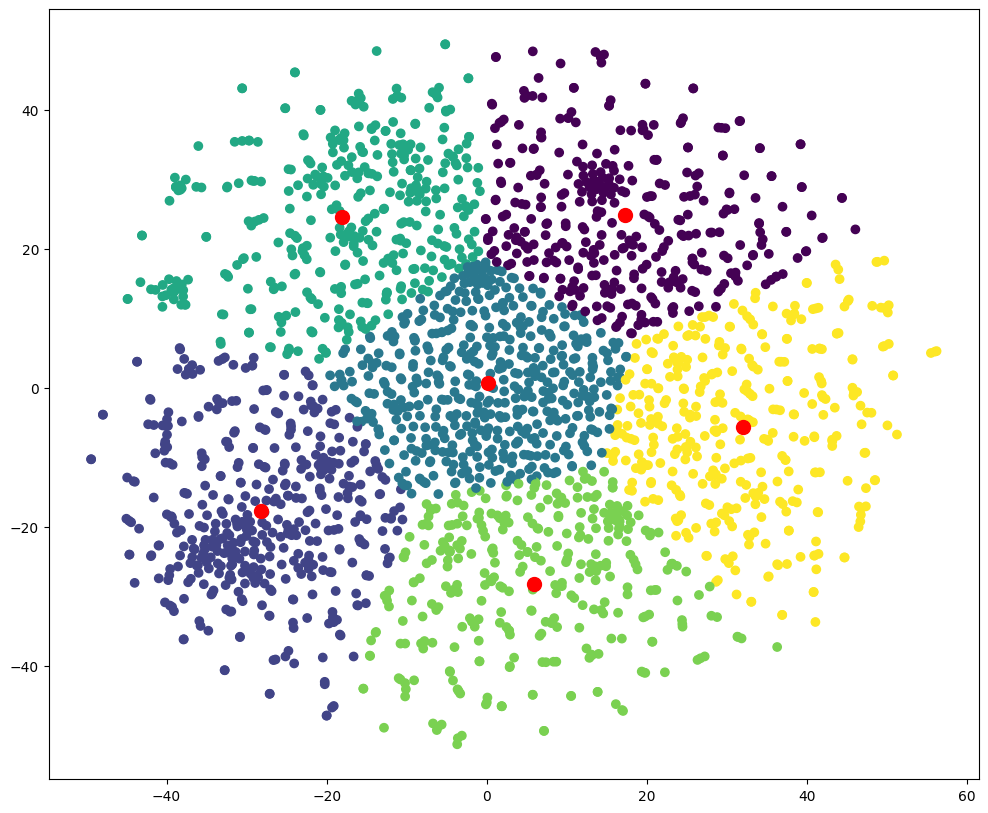

<Figure size 640x480 with 0 Axes>

In [21]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy.stats import mode

fig = plt.figure(figsize=(12,10))
text = np.empty([0,], dtype=str)
target = np.empty([0,], dtype=str)

seed = 123456
lyrics_amount = 400

count = 0
for genre in processed_lyrics:
    df = genre_dict[genre][["genre","Lyric"]].sample(n = lyrics_amount, random_state=seed)
    text = np.append(text, df.Lyric.values)
    target = np.append(target, df.genre.values)
    target[target == genre] = count
    count += 1

text_vec = TfidfVectorizer(lowercase=True, stop_words='english', analyzer='word')
text_vec.fit(text)
features = text_vec.transform(text)

tsne_2d = TSNE(n_components=2, perplexity=45, random_state=seed)

features_2d = pd.DataFrame(tsne_2d.fit_transform(features.toarray()))
cluster = KMeans(init="k-means++",n_clusters=6, n_init=50, max_iter=300, random_state=seed)
cluster.fit(features_2d)
centroid = cluster.cluster_centers_

labels = np.zeros_like(cluster.predict(features_2d))
for i in range(6):
    mask = (cluster.predict(features_2d) == i)
    labels[mask] = mode(target[mask])[0]

interval_start = 0
accuracy_sum = 0
print(f"K-means clustering")
print(f"---------------------------------")
for genre in processed_lyrics:
    target_interval = target[interval_start:interval_start+lyrics_amount]
    label_interval = labels[interval_start:interval_start+lyrics_amount]
    print(genre)
    accuracy = ((target_interval==label_interval).sum()/lyrics_amount)
    accuracy_sum += accuracy
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"---------------------------------")
    interval_start += lyrics_amount
print(f"---------------------------------")
print(f"Avg. Accuracy: {accuracy_sum/6*100:.2f}%")
print(f"---------------------------------")
print(f"---------------------------------")
plt.scatter(features_2d[0], features_2d[1], c=cluster.labels_)
plt.scatter(centroid[:,0], centroid[:,1], c='red', s=100)
plt.show()
plt.savefig("plots/clustering.png")


# Classification

In [22]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import random
from gensim.models import Word2Vec
from sklearn.svm import SVC
from numpy import mean
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

text = np.empty([0,], dtype=str)
target = np.empty([0,], dtype=str)

for genre in processed_lyrics:
    
    df = genre_dict[genre][["genre","Lyric"]].sample(n=lyrics_amount, random_state=seed)
    text = np.append(text, df.Lyric.values)
    target = np.append(target, df.genre.values)

labelled_lyrics = list(zip(text, target))
random.seed(seed)
random.shuffle(labelled_lyrics)
text , target = zip(*labelled_lyrics)
text = np.array(text)
target  = np.array(target)

def clean_text(dataset):
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    cleaned_dataset = []
    punctuation = string.punctuation
    punctuation = punctuation + '0123456789'
    word_length_cut = 1
    for text in dataset:
        text = text.lower()
        for element in punctuation:
            text = text.replace(element, '')
        text = text.replace('verse', '')
        text = text.replace('chorus', '')
        words = word_tokenize(text)
        filtered_words = [word for word in words if not word in stop_words]
        cleaned_words = [stemmer.stem(word) for word in filtered_words if not word in punctuation]
        cleaned_words = [word for word in cleaned_words if len(word) > word_length_cut]
        cleaned_dataset.append(cleaned_words)
    return cleaned_dataset
    
cleaned_text= clean_text(text)

w2v_size = 50

w2v_model = Word2Vec(cleaned_text, vector_size=w2v_size, window=10, min_count=1, sg=1, epochs=100)

single_words = set(w2v_model.wv.index_to_key)
w2v = [[w2v_model.wv[index] for index in word if index in single_words] for word in cleaned_text]

w2v_average = []
for vector in w2v:
    w2v_average.append(mean(vector, axis=0))

X_train, X_test, y_train, y_test = train_test_split(w2v_average, target, test_size=0.20, shuffle=False, random_state=seed)
length_test = len(X_test)
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)
print(f"------------------------------------------------------------------")
print(f'Model accuracy score: {accuracy_score(y_test, y_predict)*100:.2f}%')
print(f"------------------------------------------------------------------")
test_text = text[-length_test:]

def genre_accuracy(test_labels, predicted_labels):
    genres = set(test_labels)
    accuracy_dict = dict()
    for genre in genres:
        accuracy_dict[genre] = (0,np.count_nonzero(test_labels == genre))
    for index, label in enumerate(test_labels):
        if label == predicted_labels[index]:
            amount = accuracy_dict.get(label)[0]
            sum = accuracy_dict.get(label)[1]
            accuracy_dict.update({label: (amount+1, sum)})
    for genre in accuracy_dict:
        print(genre)
        print(f"Accuracy: {accuracy_dict.get(genre)[0]/accuracy_dict.get(genre)[1]*100:.2f}%")
        print(f"---------------------------------")

genre_accuracy(y_test, y_predict)

def text_from_genre(test_text, predicted_labels, number, genre, random: bool):
    full_index_list = []
    for index, label in enumerate(predicted_labels):
        if label == genre:
            full_index_list.append(index)
    if random == True:
        needed_index  = random.sample(full_index_list, number)
        output_string = f'{number} random chosen lyrics for {genre}'
    else:
        needed_index  = full_index_list[:number]
        output_string = f'First {number} lyrics for {genre}'
    print(f"------------------------------------------------------------------")
    print(output_string)
    print(f"------------------------------------------------------------------")
    for index in needed_index:
        print(test_text[index])
        print(f"------------------------------------------------------------------")

text_from_genre(test_text, y_predict, 3, 'Rap', False)


------------------------------------------------------------------
Model accuracy score: 56.46%
------------------------------------------------------------------
Heavy Metal
Accuracy: 35.80%
---------------------------------
Gospel/Religioso
Accuracy: 53.85%
---------------------------------
Romantico
Accuracy: 51.76%
---------------------------------
Country
Accuracy: 64.47%
---------------------------------
Hardcore
Accuracy: 50.00%
---------------------------------
Rap
Accuracy: 81.40%
---------------------------------
------------------------------------------------------------------
First 3 lyrics for Rap
------------------------------------------------------------------
(talking)
I wan' take the time out to give a shout out to everybody that's been helping me to get where I'm at today all tha people that been mentoring me and giving me good guidance charlie braxton, flex, scarface, lump, kj, c-loe in atl, killer mike, mat sonzalla, bun-b and all tha rest of the ol' g's that pave